<center><h1> Module 3 Project</h1></center>
<center><h1> Hypothesis Testing</h1></center>

# Authors: Dan Baumann & Sez Isguzar

# Business Problem
We are an NBA consulting firm that wish to improve the performance of NBA teams through statistical testing

Our aim is to guide the New Orleans Pelicans to the NBA 2020 Season playoffs

The Pelicans have had limited success in the past few years and reside in the bottom half of all teams for many metrics including:
* Wins
* Points conceded
* Personal fouls
* Shooting percentages 

Using hypothesis testing, we will be able to advise the franchise as how to improve their team

## The Four Areas for Improvement

Our consulting firm wants to advise the Pelicans in four key areas where we feel that drastic improvements can be made

1. Raising your 3 point shooting percentage

*The modern game requires clinical 3 point shooters* 


2. Decreasing the team's personal fouls count

*Fouls invite more scoring opportunities for opponents*


3. Raising your free throw shooting percentage

*Maximises attacking efficiency*


4. Making your defence more robust with more blocks made

*Reduce the amount of shots that your opponent successfully makes*

## Our Sample

Using an NBA stats API, we were able to gather comprehensive statistics of more than 1500 players that have played within the last 20 years

The sport has changed dramatically over generations so we feel that this time-frame best represents the modern game 

# Data Analysis

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
# import data_cleaning as dc
import hypothesis_tests as ht
# import visualizations as vz
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# final_df = dc.full_clean()

## Hypothesis One 

### 3 Point Shooting Percentage

3 point shooting is becomming increasingly popular in basketball. A shooter who can average a 40% success rate from the 3 point range is more effective than a shooter in 2 point range up until a success rate of 60%

In basketball, it is generally accepted that achieving a 40% 3P% is more feasible than achieving a 60% 2P%, thus the results of this hypothesis are highly important to any franchise 

## Hypothesis Three

### Point Guards vs Shooting Guards

### Hypothesis 3 more formally:
Null Hypothesis (H0): mu_point_guard = mu_shooting_guard
* i.e the average free throw shooting percentage for point guards is no different to the shooting percentage of a shooting guards

Alternative Hypothesis (H1): mu_point_guard > mu_shooting_guard
* i.e. the average free throw shooting percentage for point guards is greater than the shooting percentage of shooting guards

In [8]:
# call the final_df
# now need to make more cleaning functions for this one
df = pd.read_csv('./final_df.csv', index_col = 0)

In [9]:
df.head()

,Player,FG%,3P%,2P%,FT%,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,POS,height,weight
0,A.C. Green,0.442,0.062,0.448,0.675,1.890,3.722,5.615,0.865,0.633,0.202,0.602,1.572,5.440,PF,203.0,106.0
1,A.J. Guyton,0.384,0.382,0.381,0.824,0.285,0.750,1.035,1.870,0.245,0.155,0.775,0.785,5.710,PG,208.0,99.0
2,A.J. Hammons,0.405,0.500,0.375,0.450,0.360,1.270,1.640,0.180,0.050,0.590,0.450,0.950,2.180,C,198.0,99.0
3,A.J. Price,0.373,0.273,0.447,0.632,0.251,1.093,1.344,1.971,0.401,0.021,0.753,0.735,5.578,PG,213.0,124.0
4,Aaron Brooks,0.410,0.359,0.444,0.838,0.403,1.268,1.671,3.174,0.591,0.134,1.582,1.932,9.604,PG,183.0,73.0


In [10]:
from hypothesis_tests import HT3

PG       358
SG       349
SF       310
PF       297
C        232
SG-SF      4
C-PF       4
SG-PG      2
PG-SG      1
SF-PF      1
Name: POS, dtype: int64

Our data shows that we have 358 Point Guards and 349 Shooting Guards
There also seem to be players that play various positions. We will drop these from our dataframe to avoid sampling them

Point guards sample characteristics:

Sample Distribution mean: 0.758796
Sample Distribution median: 0.7613500000000002
Sample Distribution variance: 0.0005499383099259257
Sample Distribution standard deviation: 0.02345076352543613

Results for normality of point guards sample: 
Statistic: 6.777126925007995 
p-value: 0.03375713547582676

Shooting guards sample characteristics:

Sample Distribution mean: 0.7376615555555556
Sample Distribution median: 0.7391833333333333
Sample Distribution variance: 0.0006213161738765435
Sample Distribution standard deviation: 0.02492621459180161

Results for normality of shooting guards sample: 
Statistic: 1.2941723661421158 
p-value: 0.5235691409073226
Cannot reject the null hypothesis that the distribution is normal


There seems to be a distinct difference in the 

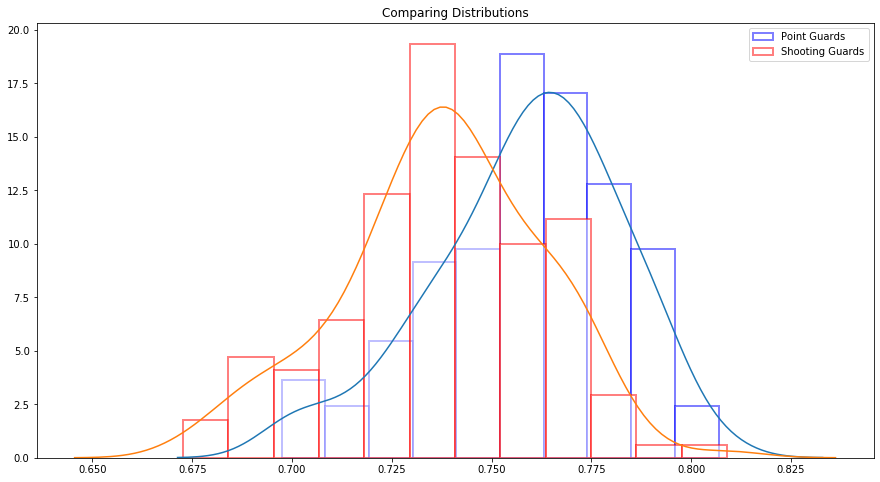

In [27]:
ht.HT3.full_hypothesis_test(alpha = 0.05, data = df)

## Hypothesis Four

### Blocks per game

In order to improve the defence of a basketball team, making more blocks per game can be highly beneficial
For this reason, the next hypothesis will be aiming to improve the roster of the team by advising selection of certain player positions

### Hypothesis 4 more formally:
Null Hypothesis (H0): mu_position = mu_other_positions
* i.e the average blocks made per game is common among all positions

Alternative Hypothesis (H1): mu_position != mu_other_positions
* i.e. the average blocks made per game differs across positions


In [29]:
from hypothesis_tests import HT4

Below is our table of results for an ANOVA test

              sum_sq      df          F         PR(>F)
C(POS)     72.202682     3.0  301.17746  3.989985e-154
Residual  124.262475  1555.0        NaN            NaN

Our f-critical value of 301 is far greater than the critical value of 4.2 at degrees of freedom 4 and alpha level 0.05 
Thus we can reject the null hypothesis that there is no difference in the means of blocks per game across positions


Pairwise comparisons may be more meaninful due to the range of results we have exhibited

Below we can see the shooting guards sample means distribution plot of blocks per game

Below we can see the point guards sample means distribution plot of blocks per game

There seems to be a distinct difference in the distribution of sample means between point guards and shooting guards. We can test for difference by using Welch's t-test
Sample t-statistic: 14.42881810480955 
Sample p-value: 0.0
Our Welch's t-statistic of 14.42881810480955 is greater 

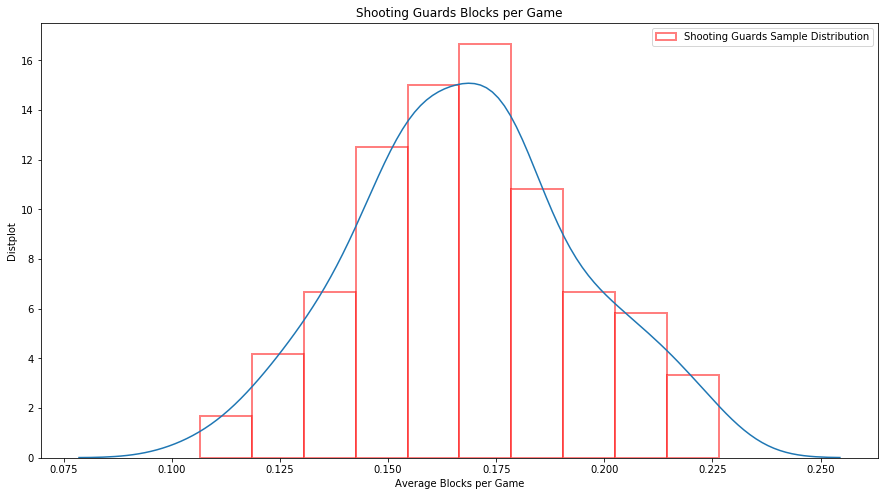

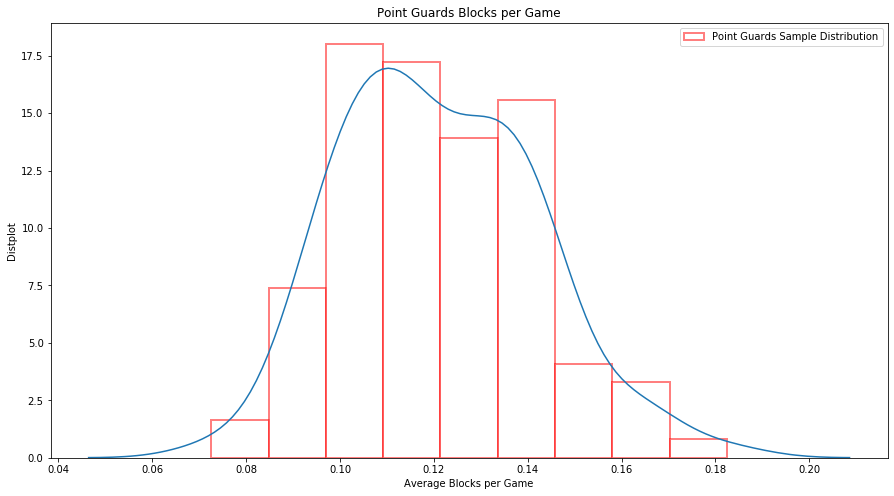

In [68]:
ht.HT4.full_hypothesis_test(data = df)